#$Imports$

In [1]:
# !pip install keras-tuner 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications as PretrainedModels
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
# import keras_tuner as kt
from tensorflow.keras.datasets import cifar10

#$Data$

> `CIFAR10 Dataset`

In [2]:
(X_train_full,Y_train_full),(X_test,Y_test) = cifar10.load_data()

X_train = X_train_full[:40000] / 255.0
Y_train = Y_train_full[:40000]

X_valid = X_train_full[40000:] / 255.0
Y_valid = Y_train_full[40000:]

X_test = X_test / 255.0

class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 11s 0us/step


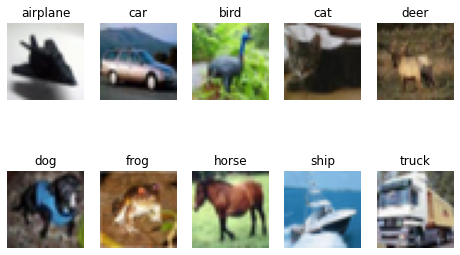

In [3]:
fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5)
fig.set_figheight(5)
fig.set_figwidth(8)

ax1.imshow(np.array(X_train[29]).reshape(32,32,3),cmap="jet")
ax1.set_title(class_names[Y_train[29][0]])
ax1.axis("off")

ax2.imshow(np.array(X_train[4]).reshape(32,32,3),cmap="jet")
ax2.set_title(class_names[Y_train[4][0]])
ax2.axis("off")

ax3.imshow(np.array(X_train[6]).reshape(32,32,3),cmap="jet")
ax3.set_title(class_names[Y_train[6][0]])
ax3.axis("off")

ax4.imshow(np.array(X_train[9]).reshape(32,32,3),cmap="jet")
ax4.set_title(class_names[Y_train[9][0]])
ax4.axis("off")

ax5.imshow(np.array(X_train[3]).reshape(32,32,3),cmap="jet")
ax5.set_title(class_names[Y_train[3][0]])
ax5.axis("off")

ax6.imshow(np.array(X_train[27]).reshape(32,32,3),cmap="jet")
ax6.set_title(class_names[Y_train[27][0]])
ax6.axis("off")

ax7.imshow(np.array(X_train[0]).reshape(32,32,3),cmap="jet")
ax7.set_title(class_names[Y_train[0][0]])
ax7.axis("off")

ax8.imshow(np.array(X_train[7]).reshape(32,32,3),cmap="jet")
ax8.set_title(class_names[Y_train[7][0]])
ax8.axis("off")

ax9.imshow(np.array(X_train[8]).reshape(32,32,3),cmap="jet")
ax9.set_title(class_names[Y_train[8][0]])
ax9.axis("off")

ax10.imshow(np.array(X_train[1]).reshape(32,32,3),cmap="jet")
ax10.set_title(class_names[Y_train[1][0]])
ax10.axis("off")


plt.show()

In [4]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train[:10000],Y_train[:10000]))
test_ds = tf.data.Dataset.from_tensor_slices((X_test[:10000],Y_test[:10000]))
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid[:10000],Y_valid[:10000]))

# Reduced the size because it was not fitting in the 12.69 GB RAM

#$Import$ $PreTrained$ $ResNet50$

> `Learning to import the desired PreTrained Model`

In [ ]:
ResNet50_PT = PretrainedModels.resnet50.ResNet50(weights="imagenet")

102981632/102967424 [==============================] - 2s 0us/step


---
$That$’$s$ $all$ $!$ This will create a $ResNet$-$50$ model and `download weights` pretrained on the `ImageNet dataset`. 

* To use it, you first need to `ensure` that the `images` have the `right size`. A $ResNet$-$50$ model `expects` $224 × 224$-`pixel images` (other models may `expect other sizes`, such as $299 × 299$).

So let’s use $TensorFlow’s$ *tf.image.resize()* `function` to `resize` the `images` we loaded earlier $:$



---

In [ ]:
# Image = np.array(X_train_full[5]).reshape(32,32,3)
img = tf.image.resize(X_train_full[:10],[224,224]) # Reshaping the image to the required shape

---
The `pretrained models` assume that the `images` are `preprocessed` in a `specific way`. In some cases they `may expect` the `inputs` to be `scaled` from `0 to 1`, or `–1 to 1`, and so on. 

Each `model provides` a `preprocess_input()` function that you can use to `preprocess` your `images`. These `functions` assume that the `pixel values` range from `0 to 255`, so we must `multiply` them by $255$ (since earlier we `scaled` them to the $0–1$ `range`).


----

In [ ]:
Inputs_preprocessed_PT = PretrainedModels.resnet50.preprocess_input(img) # Images preprocessed for the PreTrained Model

In [ ]:
Y_proba_PT = ResNet50_PT.predict(Inputs_preprocessed_PT) # This can take few mins

---
As usual, the `output Y_proba` is a `matrix` with `one row per image` and `one column per class` (in this case, there are `1,000 classes`). If you want to `display` the `top K predictions`, including the `class name` and the `estimated probability` of each `predicted class`, use the `decode_predictions() function`.


---

In [ ]:
top_k = PretrainedModels.resnet50.decode_predictions(Y_proba_PT,top=3)
for img_index in range(len(top_k)):
  print(f"Image Number : {img_index}")
  for class_id, name, y_proba in top_k[img_index]:
    print(f"Name : {name}, Proba : {y_proba * 100}%")

Image Number : 0
Name : macaque, Proba : 42.248743772506714%
Name : patas, Proba : 28.26220989227295%
Name : Walker_hound, Proba : 5.132446438074112%
Image Number : 1
Name : moving_van, Proba : 99.91242289543152%
Name : trailer_truck, Proba : 0.060136005049571395%
Name : passenger_car, Proba : 0.01608082529855892%
Image Number : 2
Name : thresher, Proba : 87.16601729393005%
Name : amphibian, Proba : 1.6205387189984322%
Name : chain_saw, Proba : 1.6006188467144966%
Image Number : 3
Name : hartebeest, Proba : 99.27088022232056%
Name : gazelle, Proba : 0.4326961934566498%
Name : African_hunting_dog, Proba : 0.16054374864324927%
Image Number : 4
Name : moving_van, Proba : 74.24018383026123%
Name : amphibian, Proba : 5.147749558091164%
Name : airliner, Proba : 4.119468107819557%
Image Number : 5
Name : chain_saw, Proba : 99.17746186256409%
Name : convertible, Proba : 0.11751701822504401%
Name : maraca, Proba : 0.07649531471543014%
Image Number : 6
Name : limpkin, Proba : 37.04201877117157%


---
The `predictions` may `not` be `satisfying` because the $CIFAR10$ data is `irrelevant` with $ResNet50's$ `training data`.

---
As you can see, it is `very easy` to create a pretty `good image classifier` using a `pretrained model`. Other `vision models` are `available` in `keras.applications`, including several `ResNet variants`, `GoogLeNet variants` like `Inception-v3` and `Xception`, `VGGNet variants`, and `MobileNet` and `MobileNetV2` (`lightweight models` for use in `mobile applications`).

But we can used these `pretrained models` and `change` them as per `our dataset` need `without harming` the `model's pretrained weights`, let's see how we can do so $?$

---

#$Transfer$ $Learning$

> `Adjusting pretrained models as per needs without harming the pretrained weights`

---
If you want to `build` an `image classifier` but you `do not` have enough `training data`, then it is `often` a `good idea` to reuse the `lower layers` of a `pretrained model`.


---

$ResNet50$

In [5]:
def preprocess_ResNet(image, label):
  img = tf.image.resize(image,[224,224])
  img = img * 255.
  final_img = PretrainedModels.resnet50.preprocess_input(img)
  return final_img, label

In [13]:
batch_size = 64
train_ds_ResNetTL = train_ds.map(preprocess_ResNet).shuffle(40000).batch(batch_size,drop_remainder=True).prefetch(1)
test_ds_ResNetTL = test_ds.map(preprocess_ResNet).shuffle(40000).batch(batch_size,drop_remainder=True).prefetch(1)
valid_ds_ResNetTL = valid_ds.map(preprocess_ResNet).shuffle(40000).batch(batch_size,drop_remainder=True).prefetch(1)

In [6]:
batch_size = 64
train_ds_XcepTL = train_ds.map(preprocess_ResNet).shuffle(40000).batch(batch_size,drop_remainder=True).prefetch(1)
test_ds_XcepTL = test_ds.map(preprocess_ResNet).shuffle(40000).batch(batch_size,drop_remainder=True).prefetch(1)
valid_ds_XcepTL = valid_ds.map(preprocess_ResNet).shuffle(40000).batch(batch_size,drop_remainder=True).prefetch(1)

---
If you want to perform some `data augmentation`, change the `preprocessing function` for the `training set`, adding some `random transformations` to the `training images`. $Present$ in the `future Notebooks`.

---
Next let’s load an $ResNet$ $model$, `pretrained` on $ImageNet$. We `exclude` the top of the network by `setting` $include$_$top$=$False$ $:$ this `excludes` the `global average pooling layer` and the `dense output layer`. Then we can add the layers we want to add. 

---

In [7]:
base_model = PretrainedModels.resnet50.ResNet50( # You can try any model you want
    include_top=False,
    weights="imagenet"
)

94781440/94765736 [==============================] - 2s 0us/step


In [8]:
GAP = GlobalAveragePooling2D()(base_model.output)
BN = BatchNormalization()(GAP)
output_layer = Dense(10,activation="softmax")(BN)

In [9]:

ResNet_TL_model = keras.Model(
    inputs=[base_model.input],
    outputs=[output_layer]
)

---
It’s usually a `good idea` to `freeze` the `weights` of the `pre‐trained layers`, at least at the `beginning` of `training` $:$

---

In [10]:
for layers in base_model.layers:
  layers.trainable = False

In [11]:
ResNet_TL_model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)

In [12]:
history = ResNet_TL_model.fit(train_ds_ResNetTL,
                                validation_data=valid_ds_ResNetTL,
                                validation_freq=1,
                                epochs=5,
                                callbacks=[EarlyStopping(patience=3)]
)

Epoch 1/5
156/156 [==============================] - 221s 1s/step - loss: 0.5927 - accuracy: 0.8025 - val_loss: 0.3798 - val_accuracy: 0.8694
Epoch 2/5
156/156 [==============================] - 186s 932ms/step - loss: 0.3030 - accuracy: 0.8959 - val_loss: 0.3594 - val_accuracy: 0.8761
Epoch 3/5
156/156 [==============================] - 167s 920ms/step - loss: 0.2312 - accuracy: 0.9219 - val_loss: 0.3459 - val_accuracy: 0.8820
Epoch 4/5
156/156 [==============================] - 167s 922ms/step - loss: 0.1863 - accuracy: 0.9370 - val_loss: 0.3460 - val_accuracy: 0.8850
Epoch 5/5
156/156 [==============================] - 168s 929ms/step - loss: 0.1514 - accuracy: 0.9527 - val_loss: 0.3473 - val_accuracy: 0.8857


---
After `training` the `model` for a `few epochs`, its `validation accuracy` should reach about $75–80$% and `stop making` much `progress`. This means that the `top layers` are now `pretty well trained`, so we are ready to `unfreeze all` the layers (or you could try `unfreezing just` the `top ones`) and `continue training` (don’t forget to `compile` the `model` when you `freeze` or `unfreeze` layers). This time we use a much `lower learning rate` to `avoid damaging` the `pretrained weights` $:$


---

In [14]:
base_model.trainable = True
opt = keras.optimizers.SGD(learning_rate=0.2,momentum=0.9,decay=0.01)
loss_ = "sparse_categorical_crossentropy"

ResNet_TL_model.compile(
    loss=loss_,
    optimizer=opt,
    metrics=["accuracy"]
)

In [15]:
history = ResNet_TL_model.fit(train_ds_ResNetTL,
                                validation_data=valid_ds_ResNetTL,
                                validation_freq=1,
                                epochs=5,
                                callbacks=[EarlyStopping(patience=3)]
)

Epoch 1/5
156/156 [==============================] - 319s 2s/step - loss: 7.9706 - accuracy: 0.1137 - val_loss: 6.7521 - val_accuracy: 0.0993
Epoch 2/5
156/156 [==============================] - 302s 2s/step - loss: 2.3161 - accuracy: 0.1193 - val_loss: 2.8412 - val_accuracy: 0.1000
Epoch 3/5
156/156 [==============================] - 305s 2s/step - loss: 2.2768 - accuracy: 0.1198 - val_loss: 2.4177 - val_accuracy: 0.1224
Epoch 4/5
156/156 [==============================] - 303s 2s/step - loss: 2.2591 - accuracy: 0.1383 - val_loss: 2.3218 - val_accuracy: 0.1168
Epoch 5/5
156/156 [==============================] - 301s 2s/step - loss: 2.2353 - accuracy: 0.1438 - val_loss: 2.2498 - val_accuracy: 0.1383


---
It will take a while, but this `model` should `reach` around $95$% `accuracy` on the `test set`. With that, you can start `training amazing image classifiers`! But there’s more to `computer vision` than just `classification`.


---

$Xception$

In [16]:
def preprocess_ResNet(image, label):
  img = tf.image.resize(image,[224,224])
  img = img * 255.
  final_img = PretrainedModels.xception.preprocess_input(img)
  return final_img, label

batch_size = 64
train_ds_XcepTL = train_ds.map(preprocess_ResNet).shuffle(40000).batch(batch_size,drop_remainder=True).prefetch(1)
test_ds_XcepTL = test_ds.map(preprocess_ResNet).shuffle(40000).batch(batch_size,drop_remainder=True).prefetch(1)
valid_ds_XcepTL = valid_ds.map(preprocess_ResNet).shuffle(40000).batch(batch_size,drop_remainder=True).prefetch(1)


base_model = PretrainedModels.xception.Xception( # You can try any model you want
    include_top=False,
    weights="imagenet"
)
GAP = GlobalAveragePooling2D()(base_model.output)
output_layer = Dense(10,activation="softmax")(GAP)


Xception_TL_model = keras.Model(
    inputs=[base_model.input],
    outputs=[output_layer]
)

for layers in base_model.layers:
  layers.trainable = False

Xception_TL_model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)

history = Xception_TL_model.fit(train_ds_XcepTL,
                                validation_data=valid_ds_XcepTL,
                                validation_freq=1,
                                epochs=5,
                                callbacks=[EarlyStopping(patience=3)]
)

83697664/83683744 [==============================] - 1s 0us/step
Epoch 1/5
156/156 [==============================] - 199s 1s/step - loss: 0.7227 - accuracy: 0.7871 - val_loss: 0.4702 - val_accuracy: 0.8450
Epoch 2/5
156/156 [==============================] - 192s 1s/step - loss: 0.4240 - accuracy: 0.8572 - val_loss: 0.4334 - val_accuracy: 0.8514
Epoch 3/5
156/156 [==============================] - 192s 1s/step - loss: 0.3706 - accuracy: 0.8734 - val_loss: 0.4093 - val_accuracy: 0.8587
Epoch 4/5
156/156 [==============================] - 193s 1s/step - loss: 0.3311 - accuracy: 0.8887 - val_loss: 0.4073 - val_accuracy: 0.8618
Epoch 5/5
156/156 [==============================] - 193s 1s/step - loss: 0.3015 - accuracy: 0.9002 - val_loss: 0.4053 - val_accuracy: 0.8587


In [17]:
base_model.trainable = True
opt = keras.optimizers.SGD(learning_rate=0.2,momentum=0.9,decay=0.01) 
loss_ = "sparse_categorical_crossentropy"

Xception_TL_model.compile(
    loss=loss_,
    optimizer=opt,
    metrics=["accuracy"]
)
history = ResNet_TL_model.fit(train_ds_XcepTL,
                                validation_data=valid_ds_XcepTL,
                                validation_freq=1,
                                epochs=5,
                                callbacks=[EarlyStopping(patience=3)]
)

Epoch 1/5
156/156 [==============================] - 267s 2s/step - loss: 2.3128 - accuracy: 0.1053 - val_loss: 2.3052 - val_accuracy: 0.0998
Epoch 2/5
156/156 [==============================] - 268s 2s/step - loss: 2.2976 - accuracy: 0.1046 - val_loss: 2.3118 - val_accuracy: 0.0952
Epoch 3/5
156/156 [==============================] - 267s 2s/step - loss: 2.2891 - accuracy: 0.1206 - val_loss: 2.3063 - val_accuracy: 0.1006
Epoch 4/5
156/156 [==============================] - 267s 2s/step - loss: 2.2686 - accuracy: 0.1307 - val_loss: 2.3184 - val_accuracy: 0.1065
